<a href="https://colab.research.google.com/github/alavalah/Task-Crime-Forecasting/blob/main/HEMA_Crime_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Crime Forecasting

In [1]:
import pandas as pd # For data manipulation and analysis.
import numpy as np # For numerical operations.
import matplotlib.pyplot as plt # For data visualization.
import seaborn as sns # For data visualization.
from sklearn.model_selection import train_test_split # For machine learning tasks.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # For saving the model.
!pip install fpdf
from fpdf import FPDF # For generating PDF reports.

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=65301d9d5a182dc17a447297ae825c4521f991c7977c97eed60b94f7f5a730fa
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [2]:
# Load the dataset
# Load the dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('cleaned_crime_data_with_census.csv')

In [3]:
# Data exploration and preprocessing
# Display the first few rows, data types, and summary statistics of the dataset.
print(df.head())
print(df.info())
print(df.describe())

        CATEGORY CALL GROUPS final_case_type  \
0  STREET CRIMES    DISORDER          DISTP    
1  STREET CRIMES    DISORDER          DISTP    
2  STREET CRIMES    DISORDER          DISTP    
3  STREET CRIMES    DISORDER          DISTP    
4  STREET CRIMES    DISORDER          DISTP    

                                           CASE DESC    occ_date  \
0  DISTURBANCE - PRIORITY                        ...  2012-03-01   
1  DISTURBANCE - PRIORITY                        ...  2012-03-01   
2  DISTURBANCE - PRIORITY                        ...  2012-03-01   
3  DISTURBANCE - PRIORITY                        ...  2012-03-01   
4  DISTURBANCE - PRIORITY                        ...  2012-03-01   

   x_coordinate  y_coordinate  census_tract  
0       7641076        684831        4900.0  
1       7642640        683167       10600.0  
2       7643599        683216       10600.0  
3       7644359        693642        3502.0  
4       7644771        683859       10600.0  
<class 'pandas.core.frame.

In [4]:
# Handle missing data
#Remove rows with missing values.
df = df.dropna()


In [5]:
# Feature engineering
#Convert the occ_date column to datetime format and extract year, month, day, and day of the week as new features.
df['occ_date'] = pd.to_datetime(df['occ_date'])
df['year'] = df['occ_date'].dt.year
df['month'] = df['occ_date'].dt.month
df['day'] = df['occ_date'].dt.day
df['dayofweek'] = df['occ_date'].dt.dayofweek

In [6]:
# Select features and target variable
#Define the features (independent variables) and the target variable (dependent variable).
features = ['x_coordinate', 'y_coordinate', 'year', 'month', 'day', 'dayofweek']
target = 'CATEGORY'

X = df[features]
y = df[target]

# Split the data into training and testing sets
# Split the data into training and testing sets (70% training, 30% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Model development
# Initialize and train a RandomForestClassifier model.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions
# Use the trained model to make predictions on the test set.
y_pred = model.predict(X_test)

In [9]:
# Evaluation metrics
# Calculate and print the accuracy, confusion matrix, and classification report to evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8053513580862198
Confusion Matrix:
[[     1      0   1443     43]
 [     1     14   2735     63]
 [    77    153 230537   6396]
 [    20     13  45297   2143]]
Classification Report:
                     precision    recall  f1-score   support

           BURGLARY       0.01      0.00      0.00      1487
MOTOR VEHICLE THEFT       0.08      0.00      0.01      2813
              OTHER       0.82      0.97      0.89    237163
      STREET CRIMES       0.25      0.05      0.08     47473

           accuracy                           0.81    288936
          macro avg       0.29      0.26      0.24    288936
       weighted avg       0.72      0.81      0.74    288936



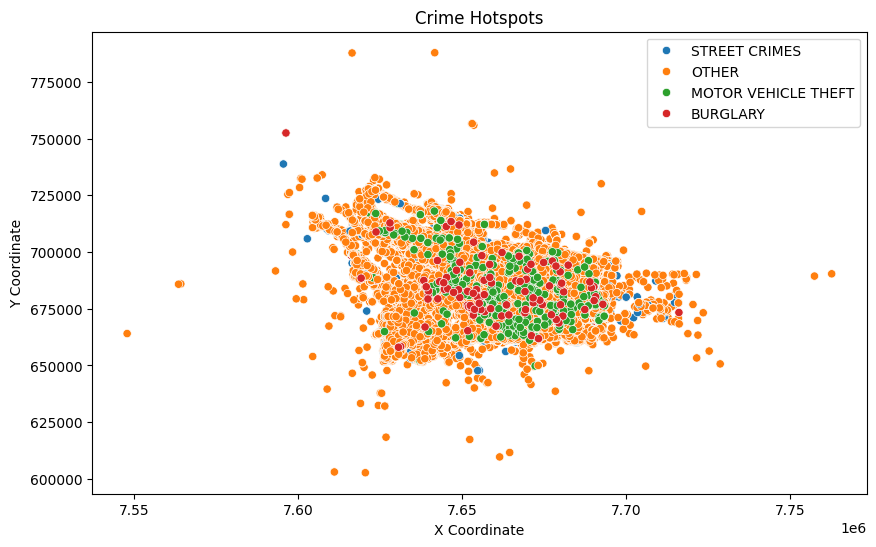

In [11]:
# Visualization of the forecasted crime hotspots
# Create a scatter plot to visualize crime hotspots based on coordinates and categories.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='CATEGORY', data=df)
plt.title('Crime Hotspots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(loc='upper right')
plt.show()

In [12]:
# Save the model and results
# Save the trained model and the forecast results to files.
joblib.dump(model, 'crime_forecasting_model.pkl')

['crime_forecasting_model.pkl']

In [13]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_csv('forecast_results.csv', index=False)


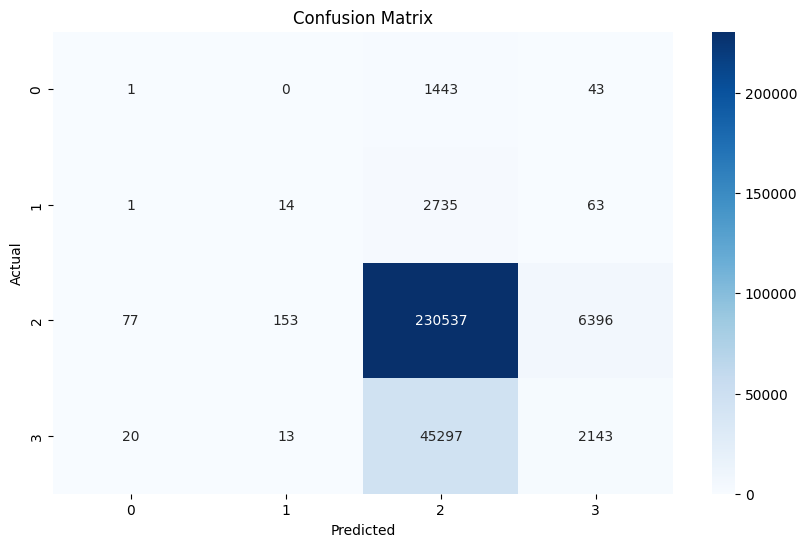

In [14]:
# Generate visualizations for the report
# Generate and save visualizations of the confusion matrix and predicted crime hotspots.
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')


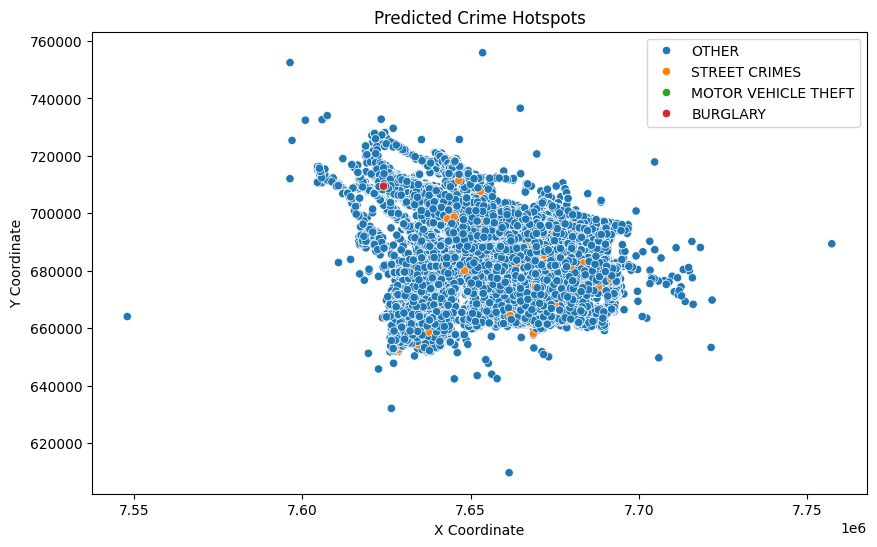

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue=y_pred, data=X_test)
plt.title('Predicted Crime Hotspots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(loc='upper right')
plt.savefig('predicted_crime_hotspots.png')

In [16]:
# Generate a report in PDF format
# Define a PDF class and generate a PDF report summarizing the data exploration, model development, evaluation, and potential improvements.
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Crime Forecasting Report', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

pdf = PDF()
pdf.add_page()

pdf.chapter_title('Data Exploration and Preprocessing Steps')
pdf.chapter_body('Loaded the dataset and converted the date column to datetime format. Extracted year, month, and day from the date. Dropped rows with missing values.')

pdf.chapter_title('Model Development and Chosen Features')
pdf.chapter_body(f'Selected features: {features}. Split the data into training and testing sets. Developed a RandomForestClassifier model.')

pdf.chapter_title('Evaluation of Model Performance')
pdf.chapter_body(f'Accuracy: {accuracy}\n\nConfusion Matrix:\n{conf_matrix}\n\nClassification Report:\n{class_report}')

pdf.chapter_title('Challenges Faced and Potential Improvements')
pdf.chapter_body('Handled missing values by dropping rows. Future improvements could include handling missing values using imputation techniques.')

pdf.output('crime_forecasting_report.pdf')

print("Report generated successfully.")

Report generated successfully.
